In [ ]:
from google.colab import drive

In [ ]:
%%capture
!pip install patool

In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive('/content/drive/MyDrive/extracted_words.zip')

INFO patool: Extracting /content/drive/MyDrive/extracted_words.zip ...
INFO:patool:Extracting /content/drive/MyDrive/extracted_words.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_589hexsw -- /content/drive/MyDrive/extracted_words.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_589hexsw -- /content/drive/MyDrive/extracted_words.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/extracted_words.zip extracted to `extracted_words'.
INFO:patool:... /content/drive/MyDrive/extracted_words.zip extracted to `extracted_words'.


'extracted_words'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from scipy import signal
from scipy.io import wavfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import os

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
%%capture
!pip install librosa
!pip install soundfile

Text(0.5, 23.52222222222222, 'Time')

Text(22.347222222222214, 0.5, 'Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

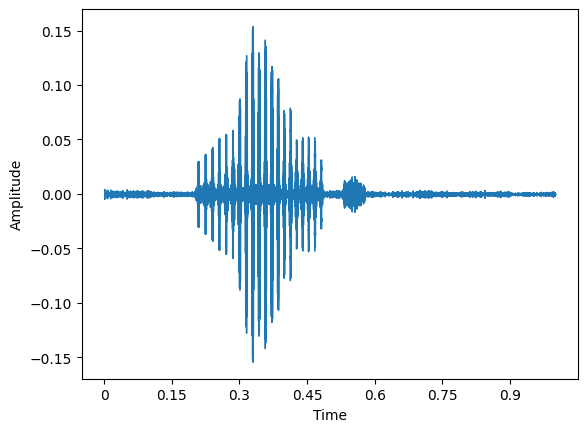

In [ ]:
import librosa

# Waveform
audio_file_path = '/content/extracted_words/train/right/1004.wav'
signal, sr = librosa.load(audio_file_path, sr=16000)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Magnitude')

<function matplotlib.pyplot.show(close=None, block=None)>

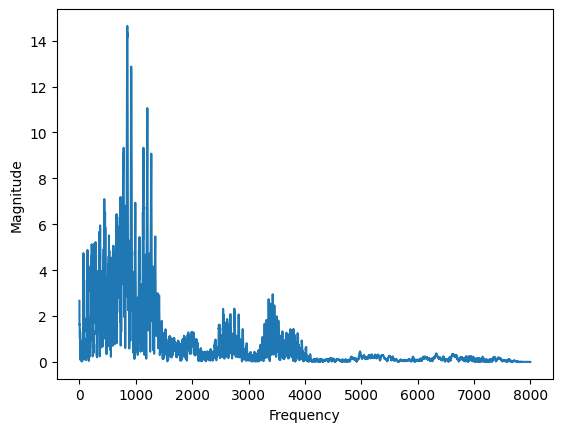

In [ ]:
# FFT, Power spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

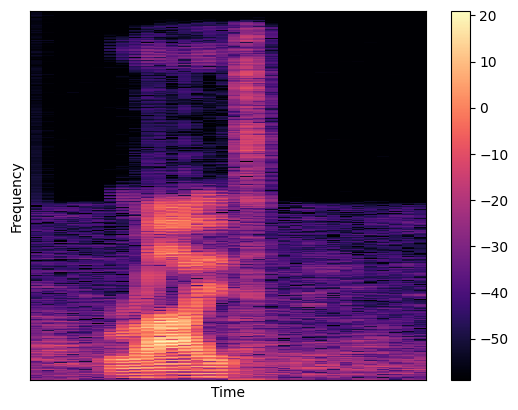

In [ ]:
# STFT - spectrogram

n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show

Text(0.5, 0, 'Time')

Text(0, 0.5, 'MFCC')

<function matplotlib.pyplot.show(close=None, block=None)>

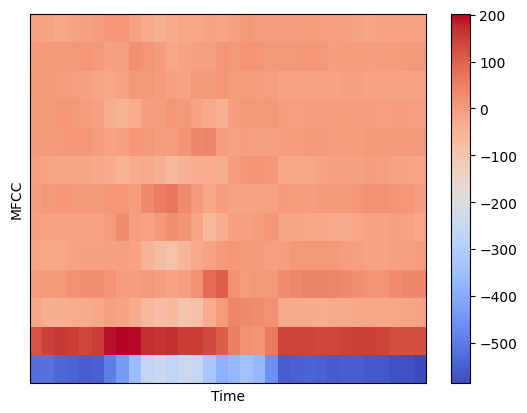

In [ ]:
# MFFCs

mffcs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
librosa.display.specshow(mffcs, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show

num labels  10


<Figure size 500x700 with 0 Axes>

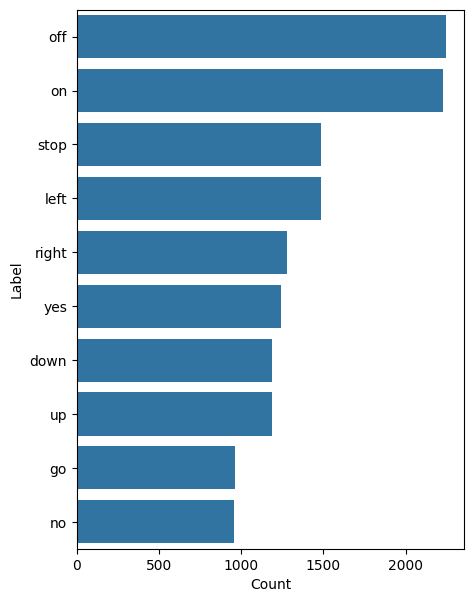

In [ ]:
all_labels = nltk.FreqDist(y)
all_labels_df = pd.DataFrame({'Label': list(all_labels.keys()), 'Count': list(all_labels.values())})
num_labels = len(all_labels)
print('num labels ',num_labels)

g = all_labels_df.nlargest(columns="Count", n = 40)
plt.figure(figsize=(5,7))
ax = sns.barplot(data=g, x= "Count", y = "Label")
#ax.set(ylabel = 'Label')

plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

mlb.fit(pd.Series(y).fillna("missing").str.split(', '))
y_mlb = mlb.transform(pd.Series(y).fillna("missing").str.split(', '))
mlb.classes_

MultiLabelBinarizer()

array(['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up',
       'yes'], dtype=object)

In [ ]:
X.shape
y_mlb.shape

(14254, 129, 71, 1)

(14254, 10)

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X,y_mlb,test_size=0.2, random_state=37)
X_val, X_test, y_val, y_test = train_test_split(X_valtest,y_valtest,test_size=0.5, random_state=37)
X_train.shape, X_val.shape,X_test.shape, y_train.shape, y_val.shape,y_test.shape

((11403, 129, 71, 1),
 (1425, 129, 71, 1),
 (1426, 129, 71, 1),
 (11403, 10),
 (1425, 10),
 (1426, 10))

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout,BatchNormalization

In [ ]:
droprate = 0.25

input_shape = (X_train.shape[1],X_train.shape[2],1)
model = Sequential()

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding="same"))
model.add(BatchNormalization())
#model.add(Dropout(droprate))
model.add(MaxPooling2D())

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
#model.add(Dropout(droprate))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(10, activation='softmax'))

In [ ]:
(None,1,X_train.shape[1],X_train.shape[2])
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta( learning_rate=0.01, weight_decay=0.00001),
              metrics=['accuracy'])
model.build()
model.summary()

(None, 1, 129, 71)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 129, 71, 512)      5120      
                                                                 
 batch_normalization (Batch  (None, 129, 71, 512)      2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 35, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 35, 256)       1179904   
                                                                 
 batch_normalization_1 (Bat  (None, 64, 35, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
from keras.callbacks import EarlyStopping
epochs = 20
batch_size = 32
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=4,
        mode='max',
        verbose=1)
]

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),shuffle=True,callbacks=callbacks)

Epoch 1/20
357/357 [==============================] - 86s 208ms/step - loss: 2.1119 - accuracy: 0.3051 - val_loss: 1.5571 - val_accuracy: 0.4814
Epoch 2/20
357/357 [==============================] - 72s 202ms/step - loss: 1.5063 - accuracy: 0.4944 - val_loss: 1.2185 - val_accuracy: 0.6204
Epoch 3/20
357/357 [==============================] - 73s 205ms/step - loss: 1.1835 - accuracy: 0.6045 - val_loss: 0.9572 - val_accuracy: 0.7172
Epoch 4/20
357/357 [==============================] - 72s 202ms/step - loss: 0.9494 - accuracy: 0.6887 - val_loss: 0.7525 - val_accuracy: 0.7937
Epoch 5/20
357/357 [==============================] - 73s 205ms/step - loss: 0.7705 - accuracy: 0.7496 - val_loss: 0.6031 - val_accuracy: 0.8316
Epoch 6/20
357/357 [==============================] - 73s 205ms/step - loss: 0.6398 - accuracy: 0.7937 - val_loss: 0.4947 - val_accuracy: 0.8737
Epoch 7/20
357/357 [==============================] - 72s 201ms/step - loss: 0.5399 - accuracy: 0.8271 - val_loss: 0.4152 - val_ac

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

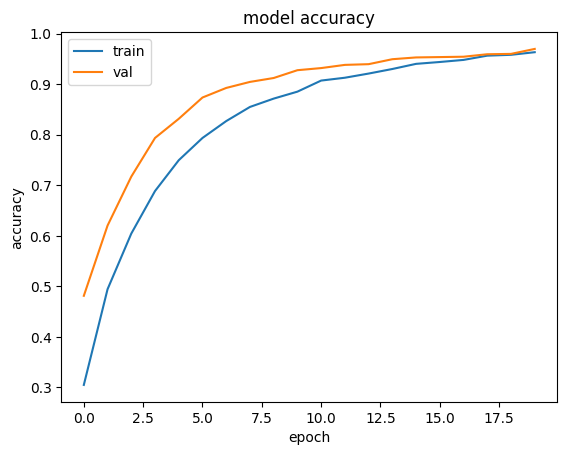

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

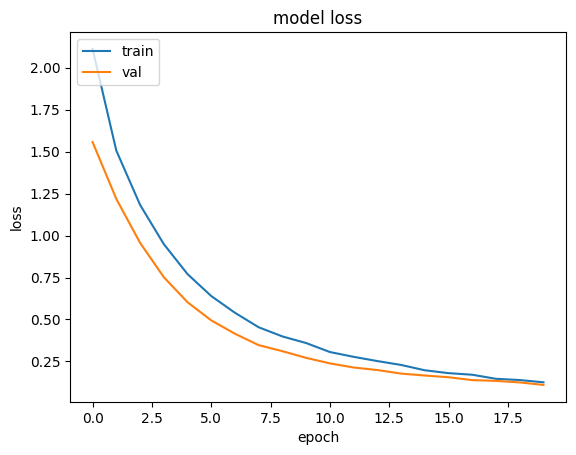

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
model.evaluate(X_test, y_test, verbose=1)
y_pred = model.predict(X_test, batch_size=32, verbose=1)

y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)
#print(classification_report(y_test, y_pred ))

print('Model accuracy: ', accuracy_score(y_test, y_pred))

report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report_df["label"] = list(mlb.classes_) + ["micro avg","macro avg","weighted avg","samples avg"]
report_df.sort_values(by=['f1-score','support'], ascending=False)

45/45 [==============================] - 3s 60ms/step - loss: 0.1111 - accuracy: 0.9719


[0.11106791347265244, 0.9719495177268982]

45/45 [==============================] - 2s 33ms/step
Model accuracy:  0.9719495091164095


,precision,recall,f1-score,support,label
7,1.000000,0.993631,0.996805,157.0,stop
9,0.991071,1.000000,0.995516,111.0,yes
2,0.986207,0.993056,0.989619,144.0,left
0,1.000000,0.970588,0.985075,136.0,down
6,1.000000,0.965812,0.982609,117.0,right
micro avg,0.971950,0.971950,0.971950,1426.0,micro avg
samples avg,0.971950,0.971950,0.971950,1426.0,samples avg
macro avg,0.974581,0.969870,0.971893,1426.0,macro avg
weighted avg,0.972401,0.971950,0.971850,1426.0,weighted avg
4,0.943775,0.991561,0.967078,237.0,off


In [ ]:
num_classes = 10
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Calculate confusion matrix
for true, pred in zip(y_test, y_pred):
    for i in range(num_classes):
        if true[i] == 1:
            for j in range(num_classes):
                if pred[j] == 1:
                    confusion_matrix[i, j] += 1

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

([<matplotlib.axis.XTick at 0x7e08e7d6f7c0>,
 [Text(0, 0, 'down'),
  Text(1, 0, 'go'),
  Text(2, 0, 'left'),
  Text(3, 0, 'no'),
  Text(4, 0, 'off'),
  Text(5, 0, 'on'),
  Text(6, 0, 'right'),
  Text(7, 0, 'stop'),
  Text(8, 0, 'up'),
  Text(9, 0, 'yes')])

([<matplotlib.axis.YTick at 0x7e08e852fee0>,
 [Text(0, 0, 'down'),
  Text(0, 1, 'go'),
  Text(0, 2, 'left'),
  Text(0, 3, 'no'),
  Text(0, 4, 'off'),
  Text(0, 5, 'on'),
  Text(0, 6, 'right'),
  Text(0, 7, 'stop'),
  Text(0, 8, 'up'),
  Text(0, 9, 'yes')])

Text(0, 0, '132')

Text(1, 0, '0')

Text(2, 0, '0')

Text(3, 0, '0')

Text(4, 0, '0')

Text(5, 0, '4')

Text(6, 0, '0')

Text(7, 0, '0')

Text(8, 0, '0')

Text(9, 0, '0')

Text(0, 1, '0')

Text(1, 1, '92')

Text(2, 1, '0')

Text(3, 1, '1')

Text(4, 1, '1')

Text(5, 1, '0')

Text(6, 1, '0')

Text(7, 1, '0')

Text(8, 1, '0')

Text(9, 1, '0')

Text(0, 2, '0')

Text(1, 2, '0')

Text(2, 2, '143')

Text(3, 2, '0')

Text(4, 2, '0')

Text(5, 2, '0')

Text(6, 2, '0')

Text(7, 2, '0')

Text(8, 2, '0')

Text(9, 2, '1')

Text(0, 3, '0')

Text(1, 3, '1')

Text(2, 3, '1')

Text(3, 3, '93')

Text(4, 3, '0')

Text(5, 3, '0')

Text(6, 3, '0')

Text(7, 3, '0')

Text(8, 3, '2')

Text(9, 3, '0')

Text(0, 4, '0')

Text(1, 4, '0')

Text(2, 4, '0')

Text(3, 4, '0')

Text(4, 4, '235')

Text(5, 4, '2')

Text(6, 4, '0')

Text(7, 4, '0')

Text(8, 4, '0')

Text(9, 4, '0')

Text(0, 5, '0')

Text(1, 5, '2')

Text(2, 5, '0')

Text(3, 5, '2')

Text(4, 5, '3')

Text(5, 5, '204')

Text(6, 5, '0')

Text(7, 5, '0')

Text(8, 5, '1')

Text(9, 5, '0')

Text(0, 6, '0')

Text(1, 6, '0')

Text(2, 6, '1')

Text(3, 6, '0')

Text(4, 6, '0')

Text(5, 6, '2')

Text(6, 6, '113')

Text(7, 6, '0')

Text(8, 6, '1')

Text(9, 6, '0')

Text(0, 7, '0')

Text(1, 7, '1')

Text(2, 7, '0')

Text(3, 7, '0')

Text(4, 7, '0')

Text(5, 7, '0')

Text(6, 7, '0')

Text(7, 7, '156')

Text(8, 7, '0')

Text(9, 7, '0')

Text(0, 8, '0')

Text(1, 8, '2')

Text(2, 8, '0')

Text(3, 8, '0')

Text(4, 8, '10')

Text(5, 8, '2')

Text(6, 8, '0')

Text(7, 8, '0')

Text(8, 8, '107')

Text(9, 8, '0')

Text(0, 9, '0')

Text(1, 9, '0')

Text(2, 9, '0')

Text(3, 9, '0')

Text(4, 9, '0')

Text(5, 9, '0')

Text(6, 9, '0')

Text(7, 9, '0')

Text(8, 9, '0')

Text(9, 9, '111')

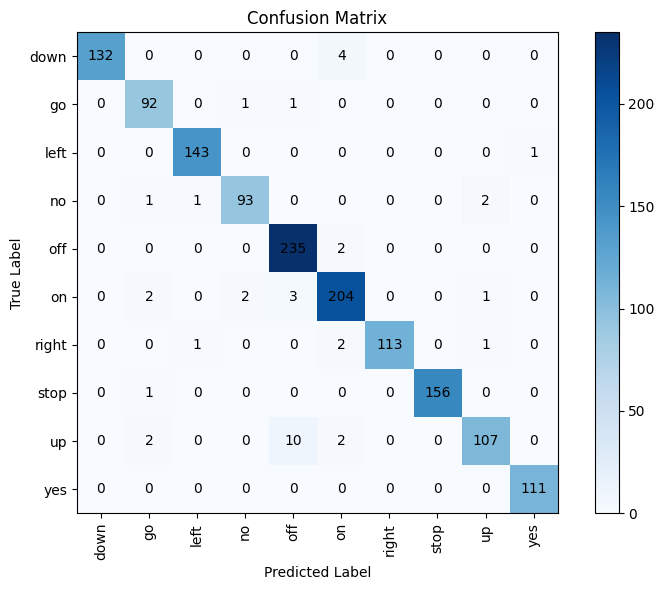

In [ ]:
labels = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up',
       'yes']
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(a, labels, rotation ='vertical')
plt.yticks(a, labels, rotation ='horizontal')
plt.tight_layout()

# Optionally, annotate cells with counts or percentages
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/new_model.keras')

In [ ]:
patoolib.extract_archive('/content/drive/MyDrive/noise.zip')

INFO patool: Extracting /content/drive/MyDrive/noise.zip ...
INFO:patool:Extracting /content/drive/MyDrive/noise.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_7flnt2kv -- /content/drive/MyDrive/noise.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_7flnt2kv -- /content/drive/MyDrive/noise.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/noise.zip extracted to `noise'.
INFO:patool:... /content/drive/MyDrive/noise.zip extracted to `noise'.


'noise'

In [ ]:
A = []
b = []

for dirname, _, filenames in os.walk('/content/noise'):
    for filename in filenames:
        if dirname.split('/')[-1]:
            sample_rate, samples = wavfile.read(os.path.join(dirname, filename))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
            A.append(spectrogram)
            b.append(dirname.split('/')[-1])
A = np.array(A)
A = A.reshape(A.shape + (1,))

In [ ]:
mlb.fit(pd.Series(b).fillna("missing").str.split(', '))
b_mlb = mlb.transform(pd.Series(b).fillna("missing").str.split(', '))
mlb.classes_

In [ ]:
A_test = A
b_test = b_mlb

In [ ]:
model.evaluate(A_test, b_test, verbose=1)
b_pred = model.predict(A_test, batch_size=32, verbose=1)

b_pred = (b_pred == b_pred.max(axis=1)[:,None]).astype(int)
#print(classification_report(y_test, y_pred ))

print('Model accuracy: ', accuracy_score(b_test, b_pred))

report_df = pd.DataFrame(classification_report(b_test, b_pred, output_dict=True)).transpose()
report_df["label"] = list(mlb.classes_) + ["micro avg","macro avg","weighted avg","samples avg"]
report_df.sort_values(by=['f1-score','support'], ascending=False)

446/446 [==============================] - 15s 33ms/step - loss: 0.6057 - accuracy: 0.8469


[0.605742871761322, 0.8469201922416687]

446/446 [==============================] - 14s 30ms/step
Model accuracy:  0.8469201627613302


,precision,recall,f1-score,support,label
7,0.994894,0.918519,0.955182,1485.0,stop
9,0.960616,0.901929,0.930348,1244.0,yes
2,0.925571,0.845791,0.883885,1485.0,left
6,0.948864,0.785266,0.859348,1276.0,right
weighted avg,0.857265,0.846920,0.849252,14254.0,weighted avg
macro avg,0.864014,0.839530,0.848870,14254.0,macro avg
micro avg,0.846920,0.846920,0.846920,14254.0,micro avg
samples avg,0.846920,0.846920,0.846920,14254.0,samples avg
0,0.886810,0.797980,0.840053,1188.0,down
3,0.830737,0.835946,0.833333,957.0,no


In [ ]:
patoolib.extract_archive('/content/drive/MyDrive/snimke.zip')

INFO patool: Extracting /content/drive/MyDrive/snimke.zip ...
INFO:patool:Extracting /content/drive/MyDrive/snimke.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_jqlavcwv -- /content/drive/MyDrive/snimke.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_jqlavcwv -- /content/drive/MyDrive/snimke.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/snimke.zip extracted to `snimke1' (local file exists).
INFO:patool:... /content/drive/MyDrive/snimke.zip extracted to `snimke1' (local file exists).


'snimke1'

In [ ]:
M = []
n = []

for dirname, _, filenames in os.walk('/content/snimke1'):
    for filename in filenames:
        if dirname.split('/')[-1]:
            sample_rate, samples = wavfile.read(os.path.join(dirname, filename))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
            M.append(spectrogram)
            n.append(dirname.split('/')[-1])
M = np.array(M)
M = M.reshape(M.shape + (1,))

In [ ]:
mlb.fit(pd.Series(n).fillna("missing").str.split(', '))
n_mlb = mlb.transform(pd.Series(n).fillna("missing").str.split(', '))
mlb.classes_

MultiLabelBinarizer()

array(['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up',
       'yes'], dtype=object)

In [ ]:
M_test = M
n_test = n_mlb

model.evaluate(M_test, n_test, verbose=1)
n_pred = model.predict(M_test, batch_size=32, verbose=1)

n_pred = (n_pred == n_pred.max(axis=1)[:,None]).astype(int)
#print(classification_report(y_test, y_pred ))

print('Model accuracy: ', accuracy_score(n_test, n_pred))

report_df = pd.DataFrame(classification_report(n_test, n_pred, output_dict=True)).transpose()
report_df["label"] = list(mlb.classes_) + ["micro avg","macro avg","weighted avg","samples avg"]
report_df.sort_values(by=['f1-score','support'], ascending=False)

2/2 [==============================] - 1s 1s/step - loss: 0.5798 - accuracy: 0.8500


[0.579820990562439, 0.8500000238418579]

2/2 [==============================] - 0s 27ms/step
Model accuracy:  0.85


,precision,recall,f1-score,support,label
6,1.000000,1.000000,1.000000,6.0,right
7,1.000000,1.000000,1.000000,6.0,stop
3,1.000000,0.833333,0.909091,6.0,no
0,0.750000,1.000000,0.857143,6.0,down
5,0.750000,1.000000,0.857143,6.0,on
micro avg,0.850000,0.850000,0.850000,60.0,micro avg
samples avg,0.850000,0.850000,0.850000,60.0,samples avg
weighted avg,0.863333,0.850000,0.848398,60.0,weighted avg
macro avg,0.863333,0.850000,0.848398,60.0,macro avg
4,0.833333,0.833333,0.833333,6.0,off
